<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import train_test_split, cross_val_score

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
assessments = '../SFDataset/san_francisco/assessor_office/assessor_data_2014_2015.csv'
assessments = pd.read_csv(assessments)

assessments.head(2)

/Users/alexanderhalcomb/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (4,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PROPLOC,RP1NBRCDE,RP1PRCLID,BASELOT,BASELOTSFX,RP1VOLUME,RP1CLACDE,YRBLT,BATHS,BEDS,...,EXEMPTYPE,RP1STACDE,RP1EXMVL2,RP1EXMVL1,ROLLYEAR,RECURRSALD,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL
0,0000 0000 0000,08H,0001 001,0,NaN,1,G,1900,0,0,...,NaN,N,0,0,14,0,0,0,0,0
1,0000 0000 0000,08H,0002 001,0,NaN,1,G,1900,0,0,...,NaN,N,0,0,14,0,0,0,0,0


In [3]:
col_key = '../SFDataset/san_francisco/assessor_office/assessor_data_key.csv'
col_key = pd.read_csv(col_key)

col_key.T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
DATA NAME,PROPLOC,RP1NBRCDE,RP1PRCLID,RP1VOLUME,RP1CLACDE,YRBLT,BATHS,BEDS,ROOMS,STOREYNO,...,EXEMPTYPE,RP1STACDE,RP1EXMVL2,RP1EXMVL1,ROLLYEAR,RECURRSALD,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL
FIELD NAME,Property Location,Neighborhood Code,Block and Lot Number,Volume Number,Property Class Code,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,...,Closed Roll Exemption Type Code,Closed Roll Status Code,Closed Roll Misc. Exemption Value,Closed Roll Homeowner Exemption Value,Closed Roll Year,Current Sales Date (YYMMDD),Closed Roll Assessed Fixtures Value,Closed Roll Assessed Improvement Value,Closed Roll Assessed Land Value,Closed Roll Assessed Personal Prop Value
FIELD DESCRIPTION,"Situs/Location, as well as room/unit number",ASR neighborhood code based on MLS districts,Block and Lot Number (Full APN),Volume number,Property type,Year improvement was built (can be blend of or...,Number of bathrooms (BA with no shower or tub ...,Number of bedrooms (bedrooms have a closet),"Number of rooms, excluding bathrooms, halls, c...",Number of stories,...,Exemption Code (see below for descriptions),"i.e. Taxable, Non-Taxable, SBE, etc.",Exemptions such as welfare,Homeowner's exemption,Roll Year,current sale date,Assessed value of fixtures,Assessed value of improvements,Assessed value of land,Assessed value of personal property


In [4]:
print assessments.shape
assessments.info()
assessments.describe()

(206816, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206816 entries, 0 to 206815
Data columns (total 41 columns):
PROPLOC       206816 non-null object
RP1NBRCDE     206731 non-null object
RP1PRCLID     206816 non-null object
BASELOT       206816 non-null int64
BASELOTSFX    45 non-null object
RP1VOLUME     206816 non-null int64
RP1CLACDE     206465 non-null object
YRBLT         206816 non-null int64
BATHS         206816 non-null int64
BEDS          206816 non-null int64
ROOMS         206816 non-null int64
STOREYNO      206816 non-null int64
UNITS         206816 non-null int64
CHGDATE       206816 non-null int64
REMARKFLA     2111 non-null object
KITCHEN       28035 non-null object
BUILTIN       206816 non-null int64
ZONE          174762 non-null object
CONSTTYPE     169753 non-null object
DEPTH         206816 non-null float64
FRONT         206816 non-null float64
SQFT          206816 non-null int64
FBA           206816 non-null int64
LAREA         206816 non-null float64
LOTC

/Users/alexanderhalcomb/anaconda/envs/dsi/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,BASELOT,RP1VOLUME,YRBLT,BATHS,BEDS,ROOMS,STOREYNO,UNITS,CHGDATE,BUILTIN,...,RP1TRACDE,OWNRPRCNT,RP1EXMVL2,RP1EXMVL1,ROLLYEAR,RECURRSALD,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL
count,206816.000000,206816.000000,206816.000000,206816.000000,206816.000000,206816.000000,206816.000000,206816.000000,206816.000000,206816.000000,...,206238.000000,206816.000000,2.068160e+05,206816.000000,206816.0,206816.000000,2.068160e+05,2.068160e+05,2.068160e+05,2.068160e+05
mean,0.634477,20.731960,1790.422158,2.370532,1.139588,7.770187,1.514733,1.805760,7272.809473,0.001325,...,1000.425140,0.881642,3.306841e+04,3131.829211,14.0,213895.188037,8.025708e+03,4.166773e+05,4.273003e+05,6.547498e+03
std,16.720328,12.956005,523.654413,8.713152,11.047561,23.462114,7.858380,15.170866,4185.389815,0.602502,...,25.673597,0.236704,1.444497e+06,3925.546667,0.0,359119.321310,6.078352e+05,4.032305e+06,2.361421e+06,5.926990e+05
min,0.000000,1.000000,0.000000,0.000000,0.000000,-7.000000,-1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000e+00,0.000000,14.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,9.000000,1909.000000,1.000000,0.000000,4.000000,1.000000,1.000000,1405.000000,0.000000,...,NaN,1.000000,0.000000e+00,0.000000,14.0,0.000000,0.000000e+00,8.894000e+04,5.802050e+04,0.000000e+00
50%,0.000000,19.000000,1929.000000,2.000000,0.000000,6.000000,1.000000,1.000000,9808.000000,0.000000,...,NaN,1.000000,0.000000e+00,0.000000,14.0,40608.000000,0.000000e+00,1.975820e+05,2.192140e+05,0.000000e+00
75%,0.000000,32.000000,1959.000000,2.000000,2.000000,8.000000,2.000000,1.000000,9908.000000,0.000000,...,NaN,1.000000,0.000000e+00,7000.000000,14.0,130507.000000,0.000000e+00,3.438468e+05,4.371990e+05,0.000000e+00
max,937.000000,45.000000,8687.000000,1002.000000,3800.000000,3606.000000,999.000000,4000.000000,9912.000000,274.000000,...,9000.000000,1.000000,3.402074e+08,532000.000000,14.0,991231.000000,1.637157e+08,6.661127e+08,2.791691e+08,1.448832e+08


In [5]:
# clean assessments df and remove outliers, targeting residential properties
assessments_clean = assessments.copy()
print assessments_clean.shape 
assessments_clean = assessments_clean[(assessments_clean['YRBLT'] < 2016) & (assessments_clean['YRBLT'] > 1875)]
print assessments_clean.shape 
assessments_clean = assessments_clean[(assessments_clean['STOREYNO'] < 4) & (assessments_clean['STOREYNO'] > 0) & (assessments_clean['UNITS'] < 2)]
print assessments_clean.shape 
assessments_clean = assessments_clean[(assessments_clean['ROOMS'] > 0) & (assessments_clean['ROOMS'] < 20)]
print assessments_clean.shape 
assessments_clean = assessments_clean[(assessments_clean['BEDS'] < 10) & (assessments_clean['BATHS'] < 10)]
print assessments_clean.shape 

(206816, 41)
(190531, 41)
(123491, 41)
(119345, 41)
(119293, 41)


In [6]:
assessments_clean.describe()

,BASELOT,RP1VOLUME,YRBLT,BATHS,BEDS,ROOMS,STOREYNO,UNITS,CHGDATE,BUILTIN,...,RP1TRACDE,OWNRPRCNT,RP1EXMVL2,RP1EXMVL1,ROLLYEAR,RECURRSALD,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL
count,119293.000000,119293.000000,119293.000000,119293.000000,119293.000000,119293.000000,119293.000000,119293.000000,119293.000000,119293.0,...,119247.000000,119293.000000,1.192930e+05,119293.000000,119293.0,119293.000000,1.192930e+05,1.192930e+05,1.192930e+05,1.192930e+05
mean,0.486919,23.835338,1939.111591,1.655411,1.088563,5.950249,1.313681,0.906348,7961.487464,0.0,...,1000.510478,0.891359,4.665217e+03,3984.182928,14.0,247798.667592,9.113484e+02,2.431656e+05,3.226826e+05,1.701005e+02
std,15.437584,12.443458,27.517611,0.892280,1.528725,2.033320,0.544472,0.291345,3690.544229,0.0,...,2.691824,0.221037,1.996909e+05,3467.611372,0.0,382347.338013,6.941883e+04,3.685446e+05,4.894241e+05,1.141599e+04
min,0.000000,1.000000,1876.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,1000.000000,0.000000,0.000000e+00,0.000000,14.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,14.000000,1921.000000,1.000000,0.000000,5.000000,1.000000,1.000000,9505.000000,0.0,...,NaN,1.000000,0.000000e+00,0.000000,14.0,0.000000,0.000000e+00,9.233300e+04,6.369300e+04,0.000000e+00
50%,0.000000,22.000000,1937.000000,1.000000,0.000000,6.000000,1.000000,1.000000,9903.000000,0.0,...,NaN,1.000000,0.000000e+00,7000.000000,14.0,50307.000000,0.000000e+00,1.776100e+05,2.163730e+05,0.000000e+00
75%,0.000000,36.000000,1952.000000,2.000000,2.000000,7.000000,2.000000,1.000000,9908.000000,0.0,...,NaN,1.000000,0.000000e+00,7000.000000,14.0,140602.000000,0.000000e+00,2.986550e+05,4.211940e+05,0.000000e+00
max,937.000000,44.000000,2015.000000,9.000000,9.000000,19.000000,3.000000,1.000000,9912.000000,0.0,...,1019.000000,1.000000,5.996272e+07,21000.000000,14.0,991230.000000,1.499706e+07,5.563665e+07,2.353637e+07,2.211105e+06


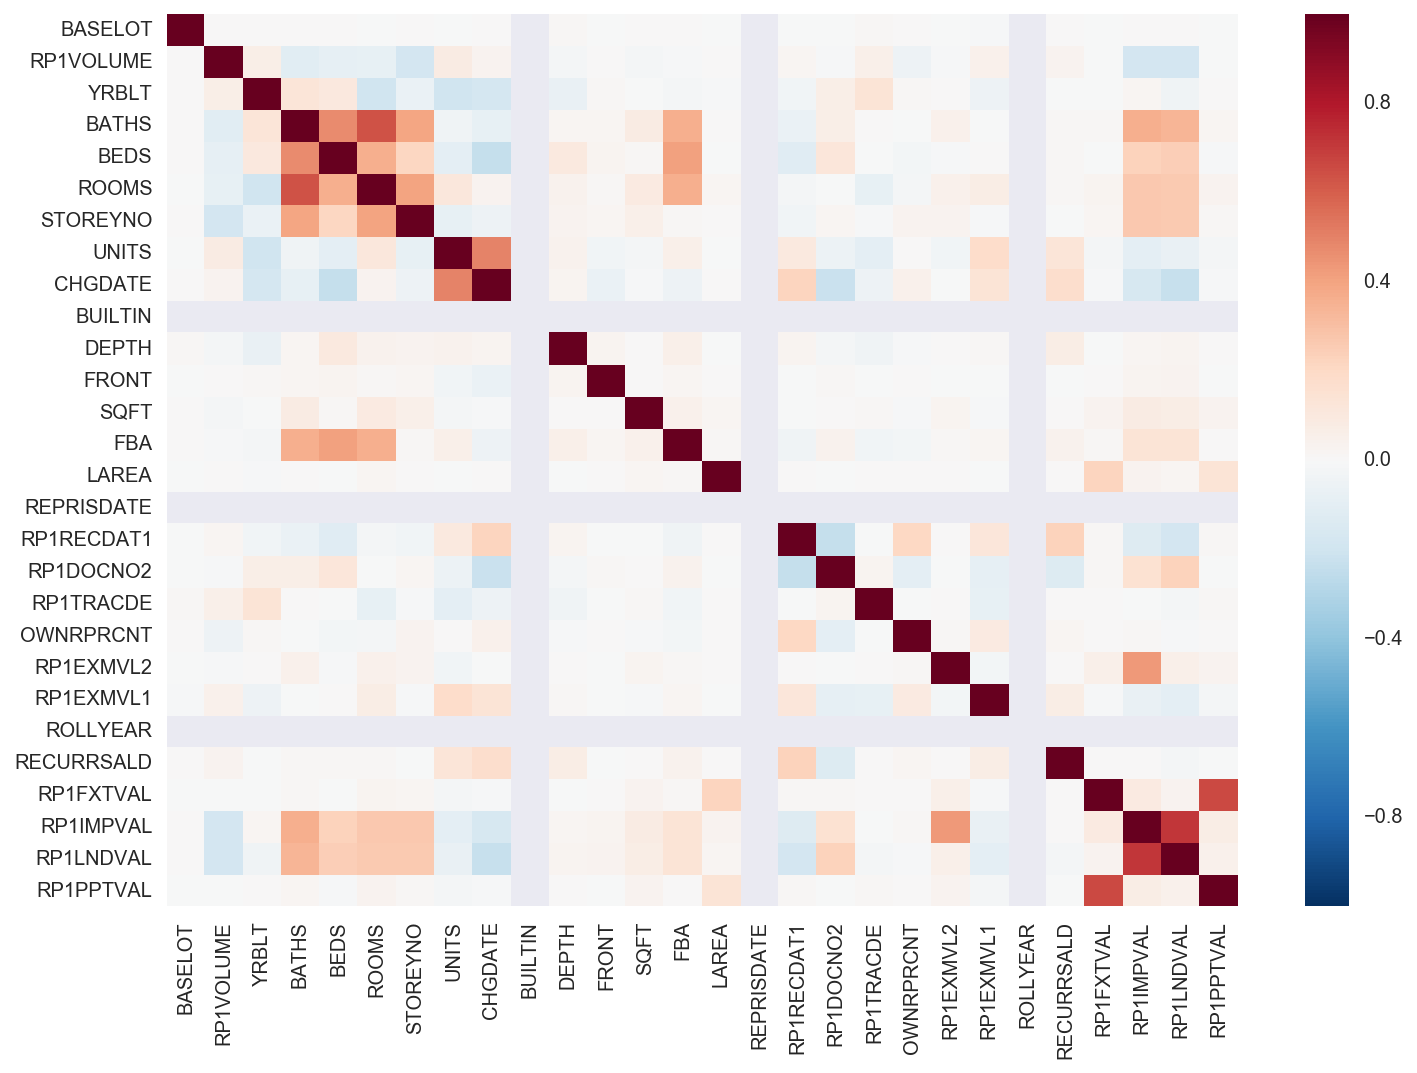

In [7]:
plt.rcParams['figure.figsize']=(12,8)
sns.heatmap(assessments_clean.corr())
plt.show()

In [8]:
# 1-1: Explain what data is. 
# This data contains property tax data as collected by the Office of the Assessor-Recorder.

# 1-2: Clean
# (above)

# 1-3: Develop hypothesis about the data. 
# The assessed value of improvements can be predicted by the number of bedrooms and 
# baths in the house, as well as the number of stories. 

# 1-4: EDA - Describe data set, initial tables, and initial plotting 
# (above)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [9]:
y = assessments_clean['RP1IMPVAL']
X = assessments_clean[['BEDS','BATHS','STOREYNO']].values

R^2:  0.154693903248


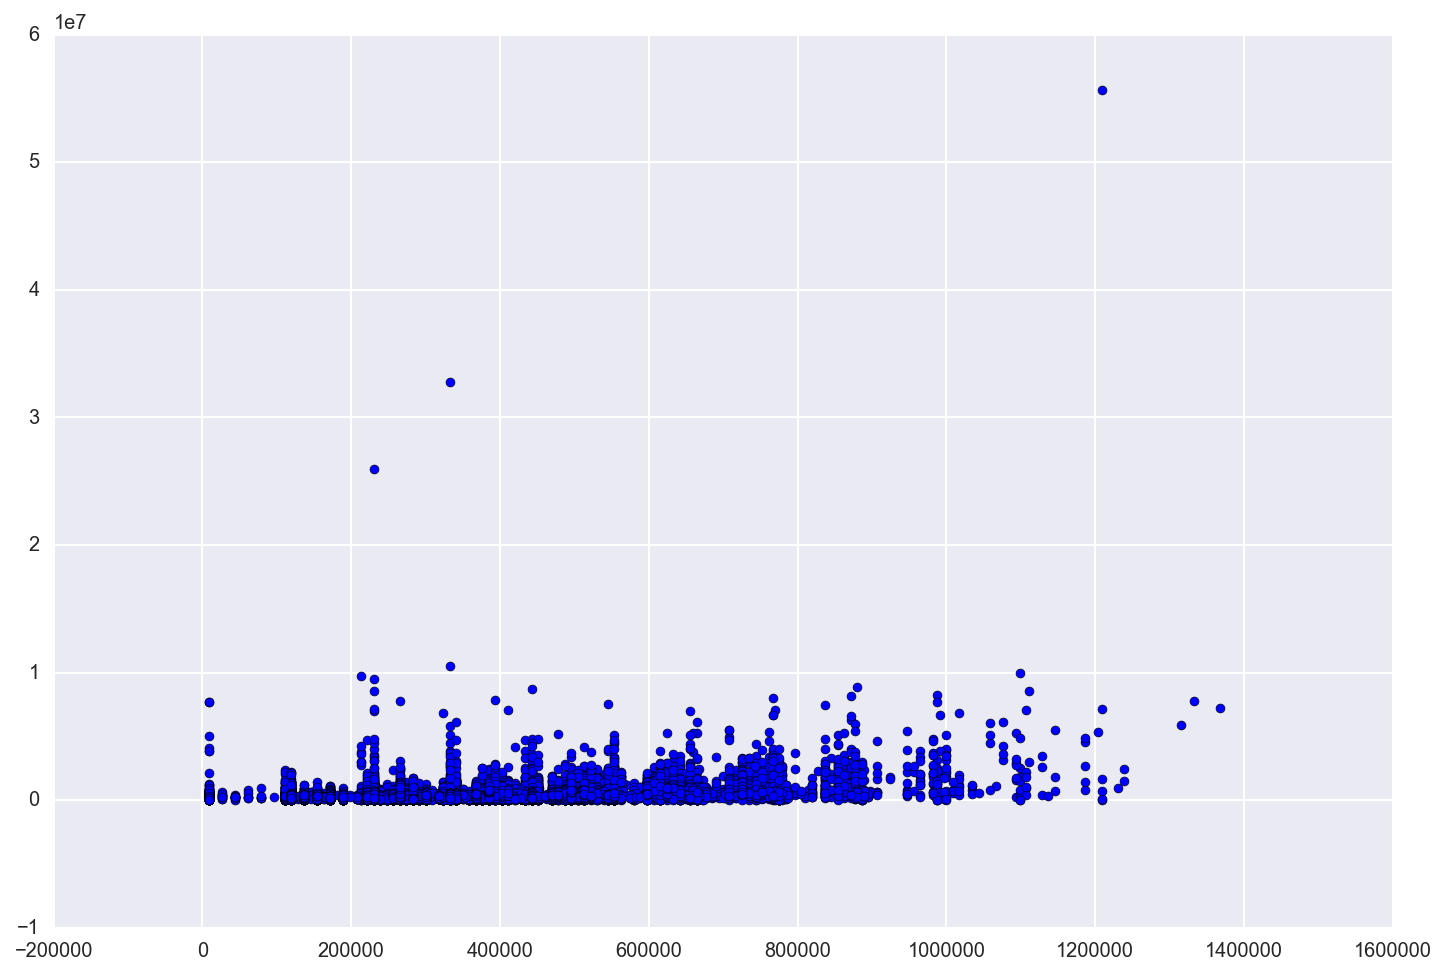

In [10]:
# Base linear regression
lm = LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

print 'R^2: ', model.score(X,y)
plt.scatter(predictions, y)
plt.show()

R^2:  0.208960877381


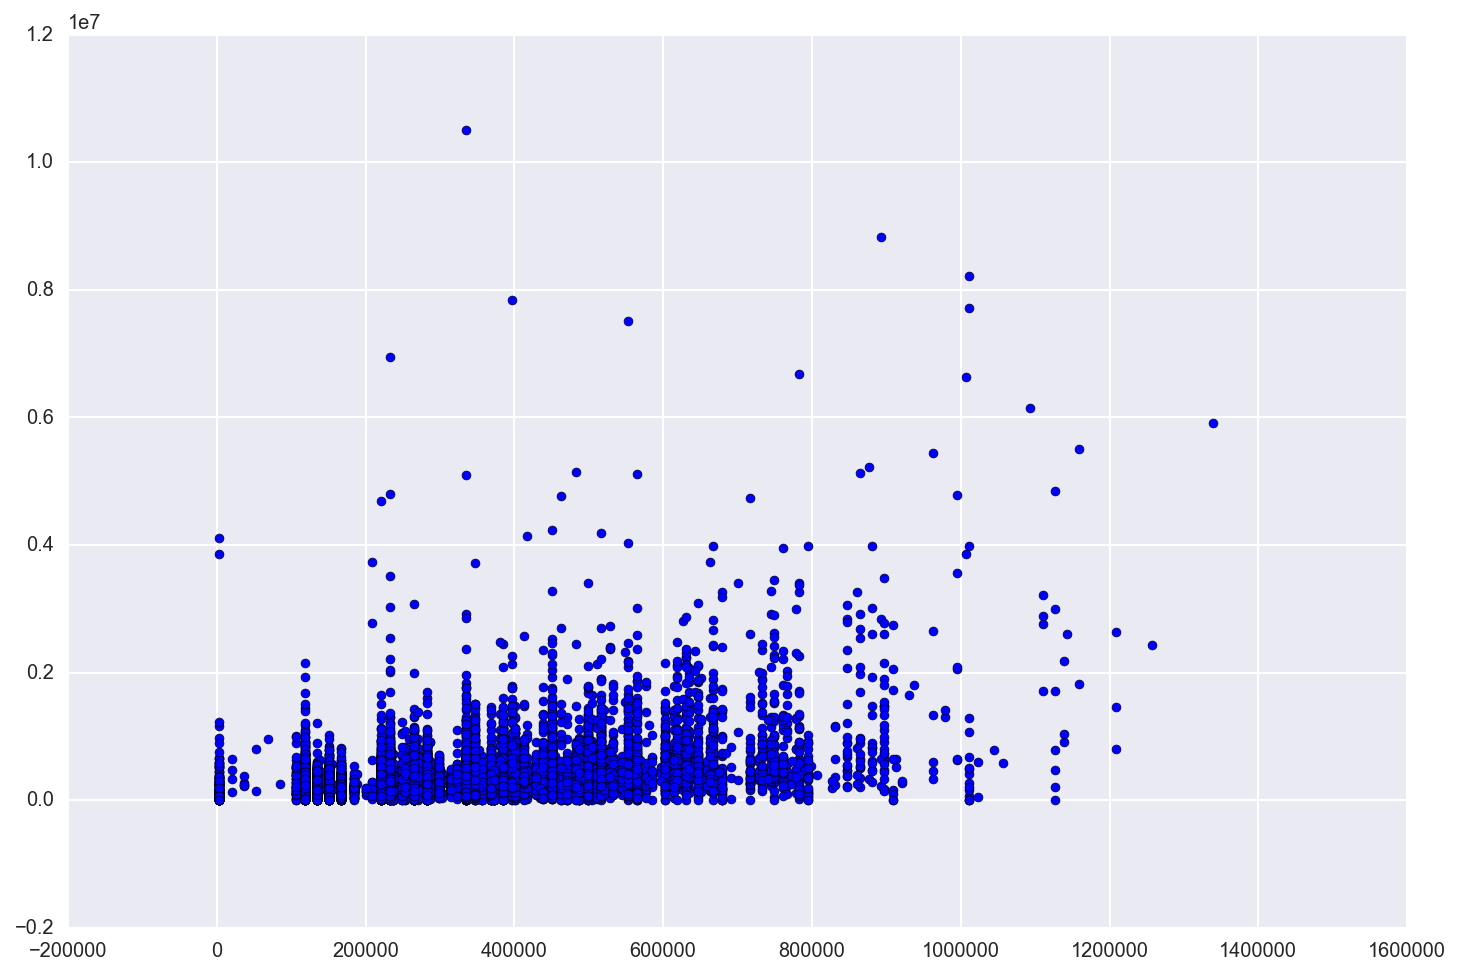

In [11]:
# CV with TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
lm_tts = LinearRegression()
model_tts = lm_tts.fit(X_train, y_train)
predictions_tts = lm_tts.predict(X_test)

print 'R^2: ', lm_tts.score(X_test,y_test)
plt.scatter(predictions_tts, y_test)
plt.show()

# Expected CV score to be lower, but somehow is coming out higher. Just pure luck due to poor initial correlation?

In [12]:
# CV with kfolds
lm_k = LinearRegression()
lm_k_scores = cross_val_score(lm_k, X, y, cv=5)

print lm_k_scores
print np.mean(lm_k_scores)

# Negative R^2 implies either poor results for initial regression or initial overfitting. Former in this case. 

[ 0.06153617 -0.19640056  0.08140856 -0.45565758 -0.02878784]
-0.107580249836


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

In [13]:
# 1. A negative R2 means that the residual sum of squares of your model (predicted y-values vs. true y-values)
# is higher than the RSS of the baseline model (y = mean(y)). 

# 2. In LSQ linear regression, R2 can never be below 0 because the RSS of the line of best fit is always 
# smaller than the RSS of the basline model. (What's a better way to put this?)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [14]:
yelp = '../SFDataset/san_francisco/yelp_sf_healthcode_violations/violations_parsed_words.csv'
yelp = pd.read_csv(yelp)

/Users/alexanderhalcomb/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
yelp.head()

,business_id,score,date,type,violation_count,days_since_first_violation,name,address,city,state,...,washed fruits,wastewater,wastewater contamination,wastewater disposal,water,water running,wiping,wiping cloths,worker,worker safety
0,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,0,0,0,0,0,0
1,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,0,0,0,0,0,0
2,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,0,0,0,0,0,0
3,10.0,94.0,2014-07-29,routine,2.0,196.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,1,1,0,0,0,0
4,10.0,94.0,2014-07-29,routine,2.0,196.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# filter out 'object' columns (improved way to do this?)
col_list = []
col_dict = dict(yelp.dtypes)
print len(col_dict)

for k,v in col_dict.items():
    if v == 'int64' or v == 'float64':
        col_list.append(k)

print len(col_list)

# Define target column
target = 'score' 

# Get the non-target cols & filter out non-patsy compatible columns (improved way to do this?)
non_target_cols = [col for col in col_list if col != target and ' ' not in col and '.' not in col and '200' not in col]
print len(non_target_cols)

# Create Patsy formula by joining strings 
formula = target + ' ~ ' + ' + '.join(non_target_cols) + ' - 1'
print formula

393
381
180
score ~ facilities + manager + infestation + improperly + warewashing + disposal + dressing + safety + lack + risk + business_id + condition + inspection + sewage + cooking + reheating + unrestricted + communicable + water + items + violation_count + permit + unapproved + use + eye + certificate + charge + handler + card + substances + keeping + haccp + longitude + temperatures + control + inaccessible + high + foods + defective + machine + hot + animal + toxic + lighting + refuse + plumbing + contaminated + personal + latitude + non + food + thermometers + records + walls + hands + labeling + ventilation + noncompliance + cloths + fish + measure + operation + living + washed + health + inadequately + certified + feet + floors + temperature + service + unsafe + cooling + unsanitary + haacp + protected + fruits + raw + shell + equipment + mouth + plan + approved + mobile + disease + clean + consumer + advisory + violation + commissary + degraded + knowledge + menu + employee

In [17]:
# Normalize predictor columns 
yelpn = yelp.copy()
yelpn.ix[:, non_target_cols] = (yelpn.ix[:, non_target_cols] - yelpn.ix[:, non_target_cols].mean()) / yelpn.ix[:, non_target_cols].std()

In [18]:
# New hypothesis - In all of the health score data, there is something that can predict health scores...Hoping to 
# get something where regularization will be effective, so including all the variables. 

# Create the X and Y pairs
Y, X = patsy.dmatrices(formula, data=yelp, return_type='dataframe')
print Y.shape, X.shape

(32455, 1) (32455, 180)


In [19]:
# Base linear regression
lm = LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

# Surprised there isn't a large boost from overfitting? 

0.031534836957137991

In [20]:
# CV 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.33)

lm = LinearRegression()
lm.fit(x_train,y_train)
lm.predict(x_test)
lm.score(x_test,y_test)

0.022945017410177404

In [21]:
yelp.corr().score[yelp.corr().score > 0.02]

score              1.000000
violation_count    0.057639
Name: score, dtype: float64

In [22]:
# Doing a quick check with just a few predictors, above results are very bad

Y, X = patsy.dmatrices('score ~ violation_count + vermin + infestation - 1', data=yelp, return_type='dataframe')

# Base linear regression
lm = LinearRegression()
model = lm.fit(X,Y)
print lm.score(X,Y)

# CV 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.33)

lm = LinearRegression()
lm.fit(x_train,y_train)
lm.predict(x_test)
print lm.score(x_test,y_test)

# Even worse. 

0.00345983884413
0.00519072179654


In [23]:
# Redefine variables using all the predictors 
Y, X = patsy.dmatrices(formula, data=yelp, return_type='dataframe')

# Normalize predictors in preparation for regularization methods 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(X)

# Do a quick lin reg, looks awful
lm = LinearRegression()
lm_scores = cross_val_score(lm, Xn, Y, cv=5)
print lm_scores
print np.mean(lm_scores)

[ -1.08019895e+23  -3.62448236e-02  -7.93931991e-02  -2.98570614e+25
  -7.92916336e+24]
-7.57884893208e+24


In [24]:
# Ridge CV
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xn, Y)

ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge_scores = cross_val_score(ridge, Xn, Y, cv=10)

print ridge_scores
print np.mean(ridge_scores)

[-0.01075855  0.01596052 -0.03090226 -0.01101407  0.00454833 -0.36053594
 -0.04186298 -0.05446904  0.01945146  0.00486083]
-0.0464721695757


In [25]:
# Lasso CV
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xn, Y)

lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, Xn, Y, cv=10)

print lasso_scores
print np.mean(lasso_scores)

/Users/alexanderhalcomb/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
...................................................................................................................................................................................................................................................................................................................................................../Users/alexanderhalcomb/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
...............................................................................................................

[-0.00436055  0.01616489 -0.02779024 -0.0079133   0.00687492 -0.34730233
 -0.03046487 -0.04405709  0.027784    0.01028927]
-0.0400775293732


In [26]:
# Enet CV
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=10, verbose=1)
optimal_enet.fit(Xn, Y)

enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
enet_scores = cross_val_score(enet, Xn, Y, cv=10)

print enet_scores
print np.mean(enet_scores)

/Users/alexanderhalcomb/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[-0.00429182  0.01611951 -0.02775939 -0.00794779  0.00686148 -0.34727134
 -0.03042134 -0.04406847  0.02775155  0.01022086]
-0.0400806746327


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


In [27]:
# Couldnt get to this or the components of #3 which are missing. Spent way too much time 
# on the initial data set cleaning/investigation. Would like to set up office hours to go through project. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?